## Importing necessary libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Creating  training, validation and test datasets

In [23]:
batch_size = 60
valid_size = 0.2

# convert the images to torch.FloatTensor
transform = transforms.ToTensor()

# split data into train and test sets
trainset = datasets.MNIST('../datasets/', train=True,transform=transform)
testset = datasets.MNIST('../datasets/', train=False, transform=transform)

# creating a validation set from the training data
num_train = len(trainset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# defining the samplers for training and validation sets
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare the data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=train_sampler)
validloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=valid_sampler)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

### Visualising a btach of images

In [24]:
dataiter = iter(validloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([60, 1, 28, 28])
torch.Size([60])


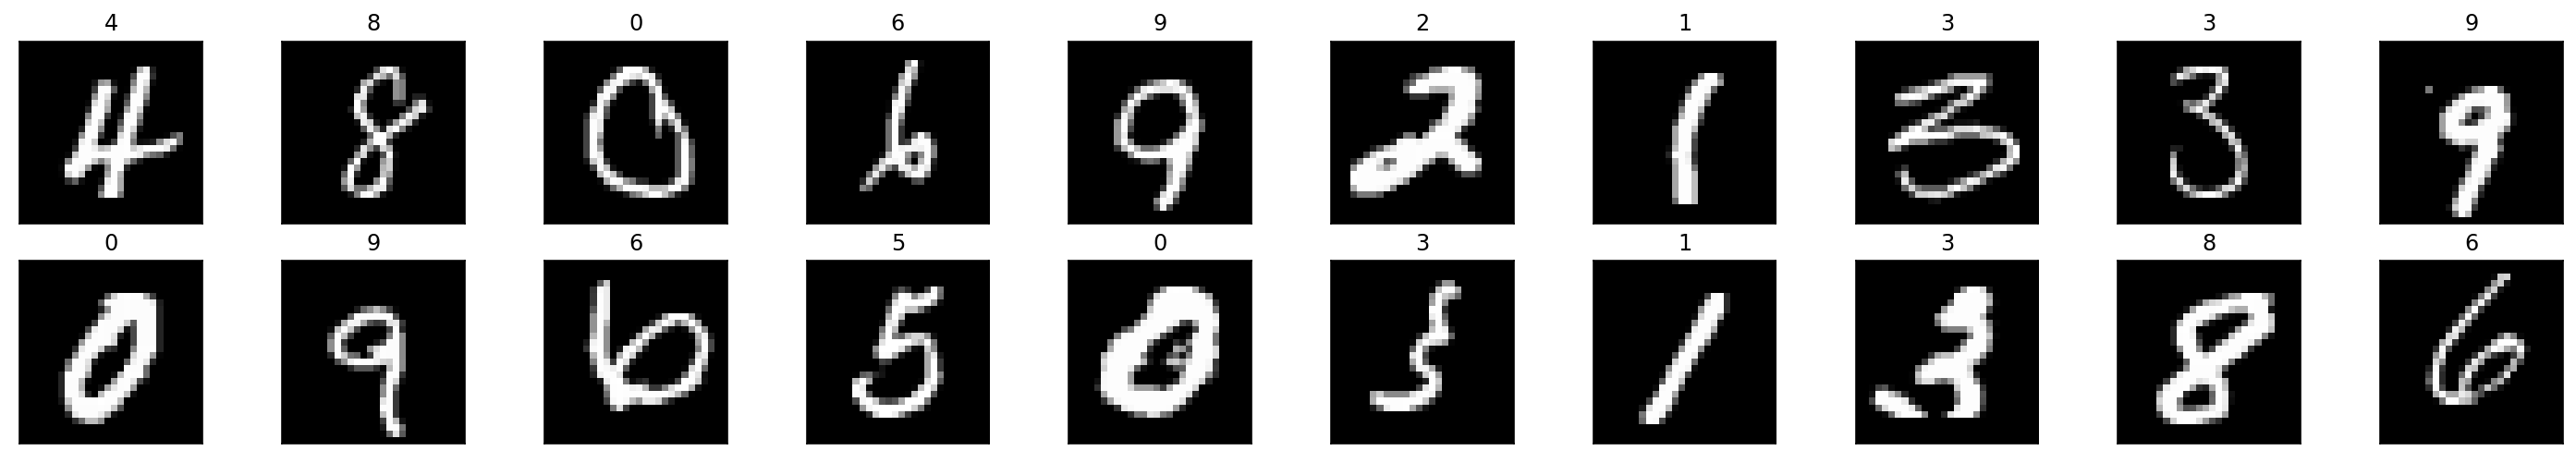

In [25]:
# .squeeze() removes dimensions of size 1.. eg if shape of a matrix is (1,28,28), then output after squeezing will be (28,28)
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [26]:
round?

Signature: round(number, ndigits=None)
Docstring:
Round a number to a given precision in decimal digits.

The return value is an integer if ndigits is omitted or None.  Otherwise
the return value has the same type as the number.  ndigits may be negative.
Type:      builtin_function_or_method


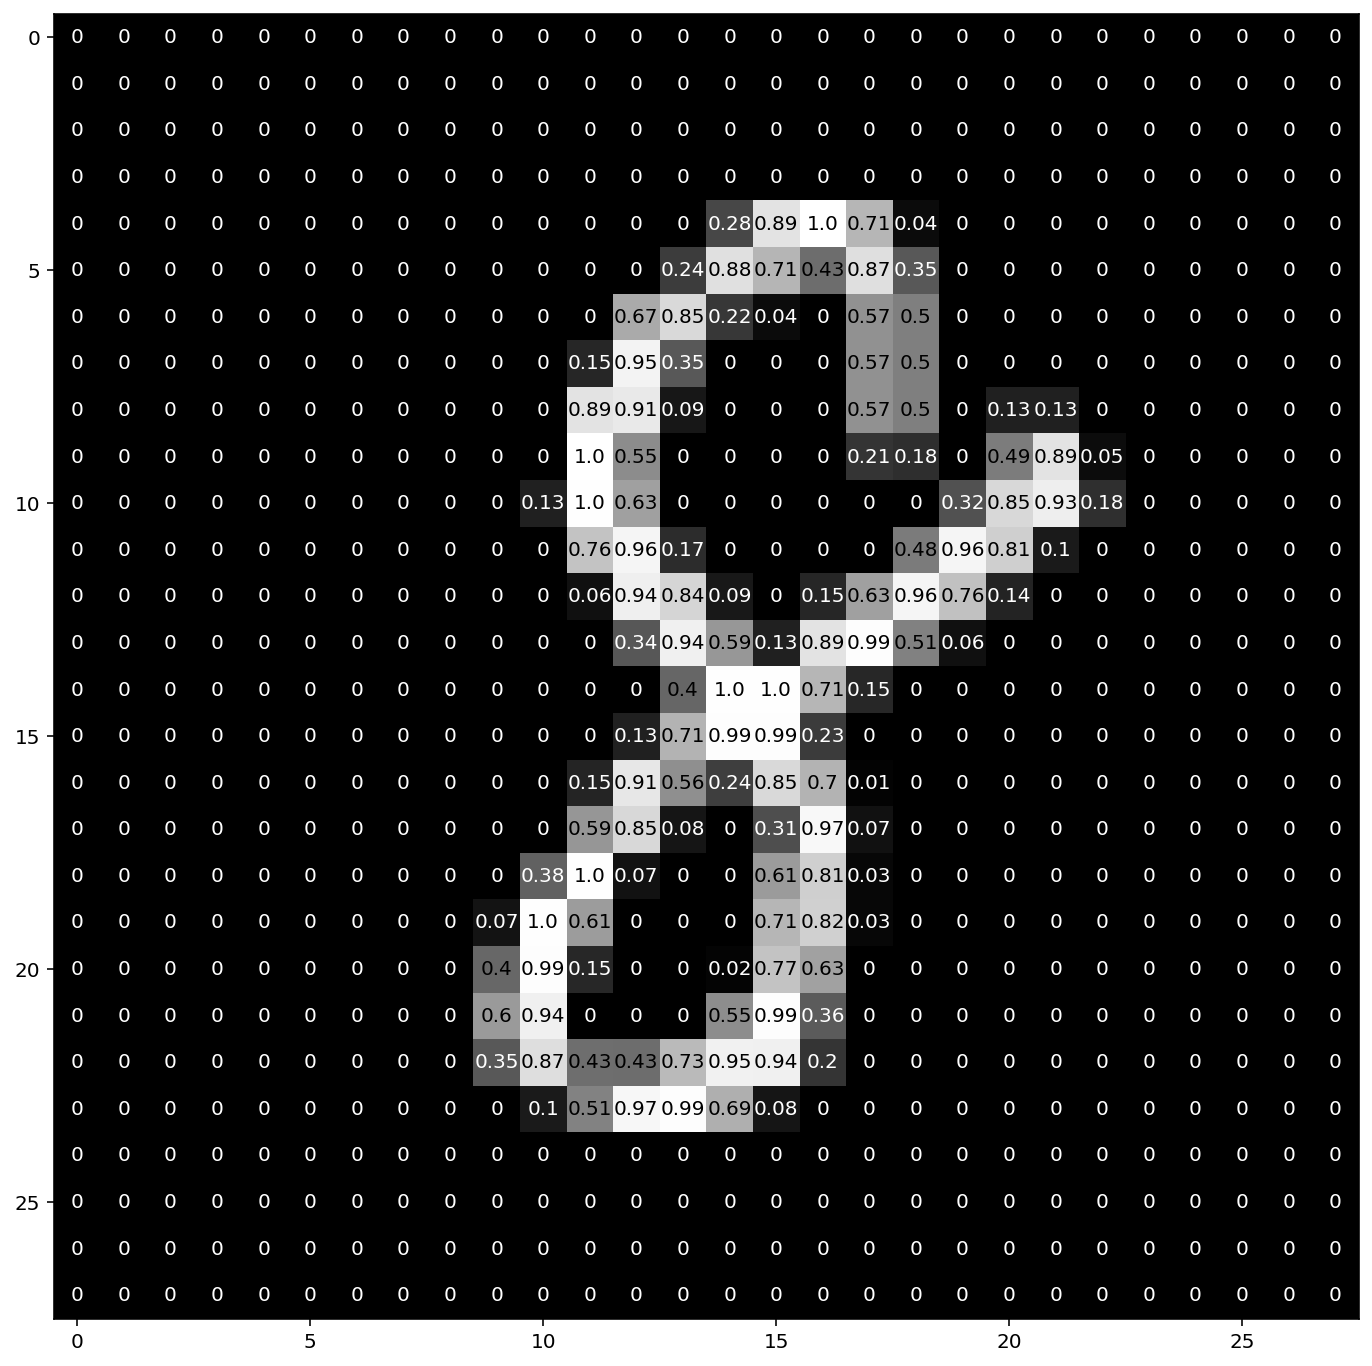

In [27]:
img = (np.squeeze(images[1])).numpy()

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = np.round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [28]:
images.view(images.shape[0],784).shape

torch.Size([60, 784])

In [29]:
images.view(images.shape[0], -1).shape

torch.Size([60, 784])

## Simple Neural Network from scratch

In [30]:
def activation(x):
    return (1/(1 + torch.exp(-x)))

def softmax(x):
    # converting the sum to shape of 64 by 1 since
    # the torch.sum returns a vector col. with 64 values.
    # we have to convert it to a shape of 64 rows with one val. per row in order to divide
    return (torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1))

inputs = images.view(images.shape[0], -1)

n_inputs = inputs.shape[1]
n_hidden = 256
n_outputs = 10

W1 = torch.randn(n_inputs,n_hidden)
W2 = torch.randn(n_hidden,n_outputs)

B1 = torch.randn(n_hidden)
B2 = torch.randn(n_outputs)

y_hidden = activation(torch.mm(inputs, W1) + B1)
y_output = softmax(torch.mm(y_hidden, W2) + B2)

In [31]:
print(y_hidden.shape)
print(y_hidden.dtype)

torch.Size([60, 256])
torch.float32


In [32]:
y_output[:5]

tensor([[7.0097e-03, 5.3021e-07, 9.9299e-01, 2.0216e-11, 2.1144e-19, 6.6712e-07,
         5.1921e-10, 3.1149e-09, 2.3064e-12, 6.6475e-10],
        [9.9998e-01, 1.4352e-05, 5.8561e-09, 9.3073e-10, 1.9240e-20, 7.9568e-08,
         2.7905e-13, 3.0008e-13, 3.2064e-16, 7.5099e-06],
        [1.3958e-02, 8.4528e-02, 4.9832e-04, 1.7552e-11, 6.5737e-13, 1.8966e-09,
         1.6523e-10, 9.4595e-06, 1.2096e-12, 9.0101e-01],
        [3.6288e-06, 1.6480e-08, 5.6710e-01, 4.1651e-07, 3.1687e-15, 2.4356e-03,
         3.5703e-01, 8.1561e-15, 9.6961e-14, 7.3425e-02],
        [3.3241e-04, 3.0506e-06, 9.9963e-01, 3.6194e-05, 7.6940e-16, 6.6164e-07,
         1.0395e-06, 3.9614e-08, 4.2792e-16, 1.0407e-06]])

In [33]:
W1[:5]

tensor([[ 0.8532, -0.7312, -0.9155,  ...,  0.0297,  0.2405,  0.1033],
        [-1.5188,  0.1486,  0.6757,  ...,  0.0394,  1.3086, -0.7845],
        [ 0.7811, -1.6250, -1.1601,  ...,  0.8667,  0.4232,  0.9790],
        [-0.2354,  1.7651, -0.2898,  ...,  2.0268,  0.8262, -0.9788],
        [-0.8640, -1.6687, -0.0313,  ...,  0.8667,  0.9732,  0.8712]])

In [34]:
print(y_output.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


## Defining the architecture using PyTorch module

In [41]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # defining the layers
        hidden_1 = 256
        hidden_2 = 128
        hidden_3 = 64
        
        self.fc1 = nn.Linear(784, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, hidden_3)
        self.fc4 = nn.Linear(hidden_3, 10)
        
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # flatten image input
        x = x.view(x.shape[0], -1)
        
        # pass through hidden layers with relu activation and dropout layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        
        # pass through output layer with log softmax activation
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

model = Network()
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


#### Specify Loss function and Optimiser

In [42]:
criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr=0.003)

In [43]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device);
device

device(type='cuda', index=0)

In [46]:
%%time

epochs = 50
# setting min. valid. loss to array of infinity vals. so that the loss is very high initially
valid_loss_min = np.Inf

for e in range(epochs):
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for images, labels in trainloader:
        
        # Transfering the data to the GPU to make computation more efficient
        images = images.to(device)
        labels = labels.to(device)
        
        # clear the gradients
        optimizer.zero_grad()
        
        # perform a forward pass and store outputs
        net_output = model(images)
        # calculate loss 
        loss = criterion(net_output, labels)
        # perform a backward pass to calculate gradients
        loss.backward()
        # perform an optimisation step (ie. update parameters)
        optimizer.step()
        # track training loss
        train_loss += loss.item()*images.size(0)
        
    ######################
    # validate the model #
    ######################
    else:
        # turn off gradients for validation (saves memory and computation)
        with torch.no_grad():
#             turn on evaluation mode, ie. turn dropouts to zero
            model.eval()
            for images, labels in validloader:
                images = images.to(device)
                labels = labels.to(device)

                net_output = model(images)
                loss = criterion(net_output, labels)

                valid_loss += loss.item()*images.size(0)


        model.train()
        # calculate avg. loss for each epoch
        train_loss = train_loss/len(trainloader.sampler)
        valid_loss = valid_loss/len(validloader.sampler)

        print("Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(e+1, train_loss, valid_loss))

        # save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print("Validation Loss has decreased from {:.6f} to {:.6f}.  Saving model...".format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model.pt')
            valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.336825 	Validation Loss: 0.163178
Validation Loss has decreased from inf to 0.163178.  Saving model...
Epoch: 2 	Training Loss: 0.166096 	Validation Loss: 0.121337
Validation Loss has decreased from 0.163178 to 0.121337.  Saving model...
Epoch: 3 	Training Loss: 0.132965 	Validation Loss: 0.121805
Epoch: 4 	Training Loss: 0.115938 	Validation Loss: 0.104235
Validation Loss has decreased from 0.121337 to 0.104235.  Saving model...
Epoch: 5 	Training Loss: 0.109066 	Validation Loss: 0.110696
Epoch: 6 	Training Loss: 0.100007 	Validation Loss: 0.112695
Epoch: 7 	Training Loss: 0.089906 	Validation Loss: 0.097457
Validation Loss has decreased from 0.104235 to 0.097457.  Saving model...
Epoch: 8 	Training Loss: 0.085254 	Validation Loss: 0.098531
Epoch: 9 	Training Loss: 0.082077 	Validation Loss: 0.097732
Epoch: 10 	Training Loss: 0.078755 	Validation Loss: 0.090963
Validation Loss has decreased from 0.097457 to 0.090963.  Saving model...
Epoch: 11 	Training Loss

### Load the best model (lowest validation loss)

In [48]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

### Test the model

In [64]:
test_loss = 0
accuracy = 0
model.eval()

with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        
        log_probs = model(images)
        batch_loss = criterion(log_probs, labels)
        
        test_loss += batch_loss.item()*images.size(0)
        
        # obtain clas probabilities
        probs = torch.exp(log_probs)
        # obtain the most likely class for the images
        top_p, top_class = probs.topk(1, dim=1)
        # comparing the top class to the labels to check for discrepancies
        # both top_class and labels need to be in the same shape
        equals = top_class == labels.view(*top_class.shape)
        # equals is a byte tensor and hence has to be converted to float type in order to calculate mean.
        accuracy += torch.mean(equals.type(torch.FloatTensor))


model.train()
test_loss = test_loss/len(testloader.sampler)

print("Test Loss: {:.6f} \tAccuracy: {:.3f}%".format(test_loss, (accuracy/len(testloader))*100))


Test Loss: 0.097138 	Accuracy: 97.894%


## Visualising the results

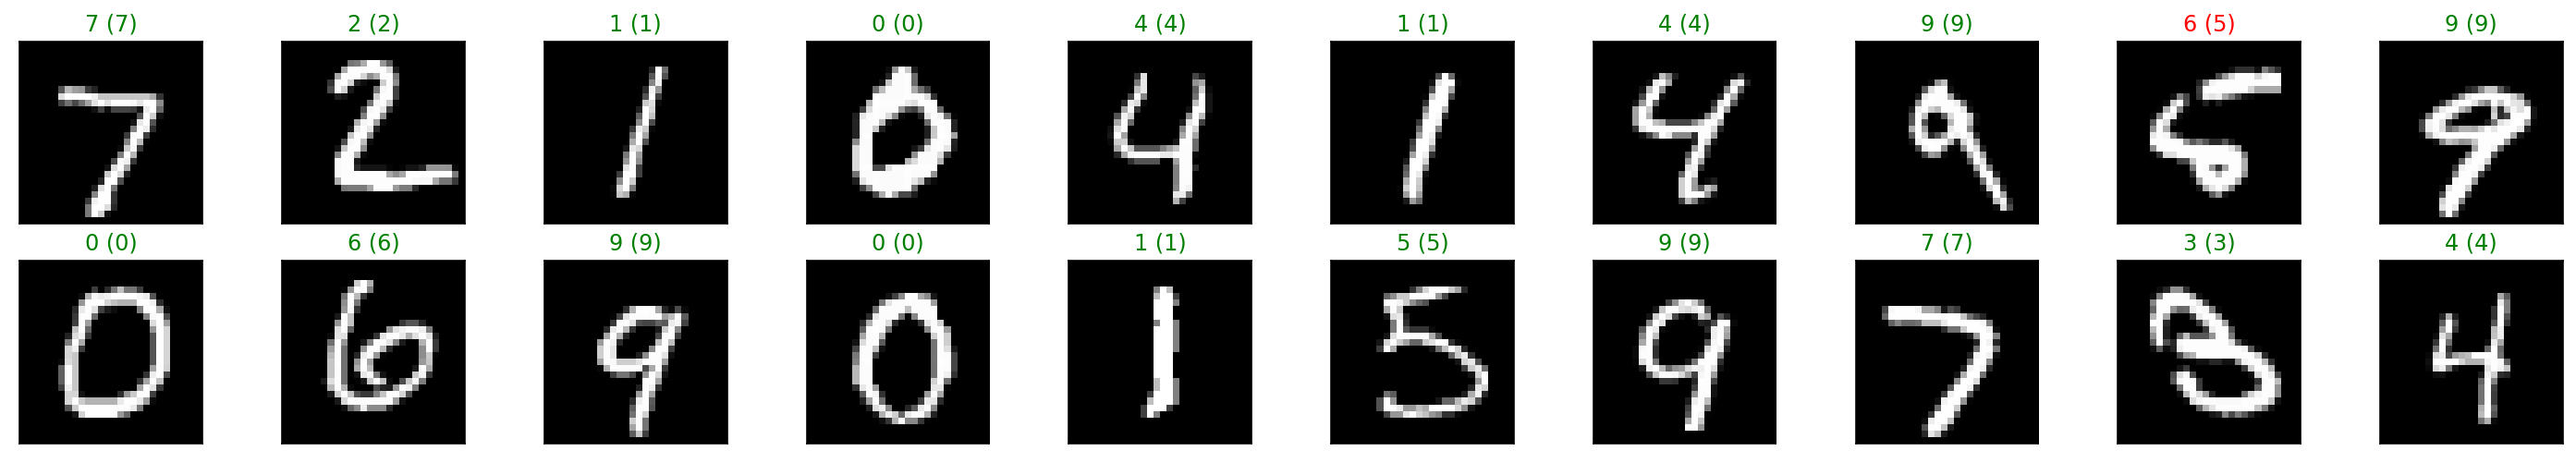

In [68]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [69]:
torch.cuda.empty_cache()

In [70]:
del model